In [167]:
import numpy as np
import sys
sys.path.append("../model")
from rnn_FORCE import RNN
import matplotlib.pyplot as plt
import torch
from torch import nn
import seaborn as sns
SAVEFIG = False

### Exercise 1: No Feedback Connection, Auto Network

To replicate exercise 1: N = 1000, with self connection, tanh, timestep = 0.1. g = 0.5, state converge to 0; g = 1, state converge to non-zero; g = 1.5, state diverge.

N = 1000 is important, if N = 100, it will converge when g = 1.5.

Without self connection, it will converge when g = 1.5. But g = 2 could make it diverge.

And tanh is also very important. With sigmoid, to diverge, g needs to be very large, like 10.

With 2 * sigmoid - 1, it can diverge with g = 5.

With Dale's law, need g = 3 to diverge. Not stable.

In [60]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)  # change this would affect

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) * 0
init_state = np.zeros((num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

In [61]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = [1]*excite_num + [-1]*(num_nodes-excite_num)
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

In [62]:
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=5, activation_func=nn.Tanh())
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=4)
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh(), output_nonlinearity=lambda x: x)

In [63]:
network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
states, activations, outputs = network.simulate(120)

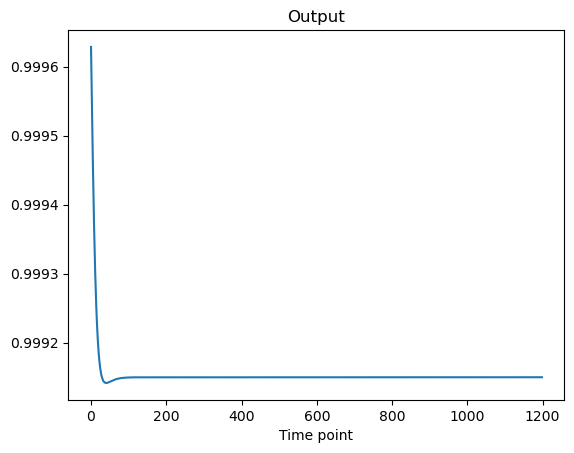

In [64]:
plt.plot(outputs)
plt.title("Output")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_output.png")

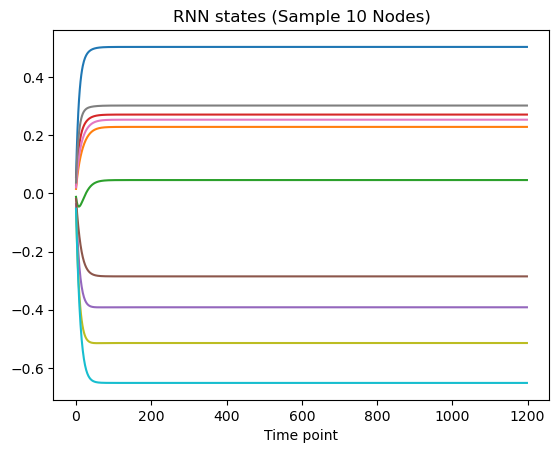

In [65]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])
plt.title("RNN states (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_states.png")

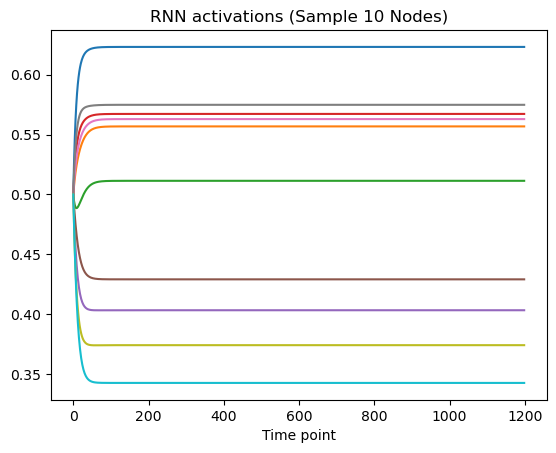

In [66]:
all_activations = np.concatenate(activations, axis=1)
for i in range(10):
    plt.plot(all_activations[i, :])
plt.title("RNN activations (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_activations.png")

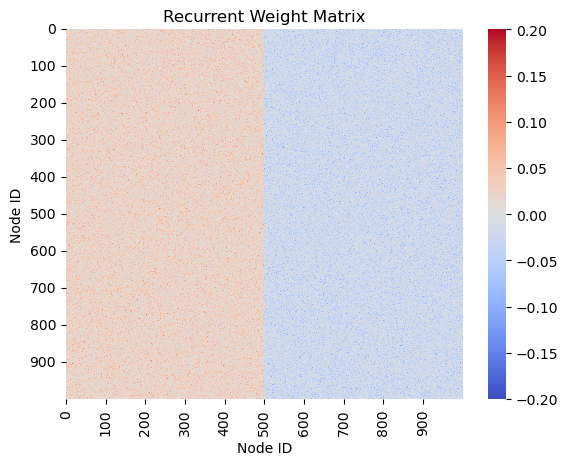

In [67]:
sns.heatmap(weight_matrix, vmax=0.2, vmin=-0.2, cmap="coolwarm")
plt.xlabel("Node ID")
plt.ylabel("Node ID")
plt.xticks(np.arange(0, 1000, 100), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 1000, 100), np.arange(0, 1000, 100))
plt.title("Recurrent Weight Matrix")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_rcweight.png")

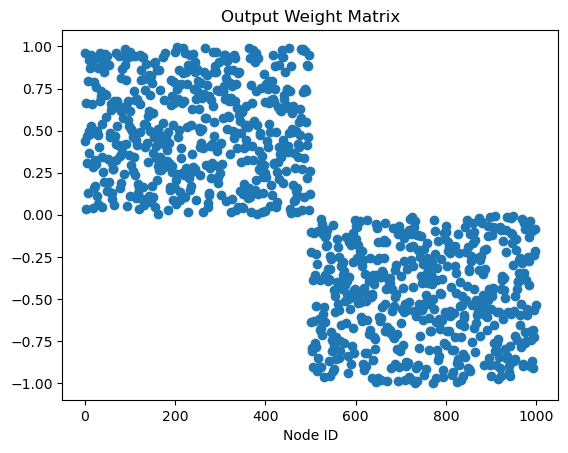

In [68]:
plt.plot(output_weight_matrix.flatten(),'o')
plt.xlabel("Node ID")
plt.title("Output Weight Matrix")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_outweight.png")

### Exercise 2: Feedback Target

To replicate exercise 2: set target = targets.

Multiply 0.5 to feedback_weight_matrix would make it chaotic.

With Dale's law, harder to chaotic.

In [69]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(6000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [70]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = [1]*excite_num + [-1]*(num_nodes-excite_num)
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

In [71]:
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#               timestep=0.1, g=1.5, activation_func=nn.Tanh(), output_nonlinearity=lambda x: x, target=targets)
network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
states, activations, outputs = network.simulate(120)

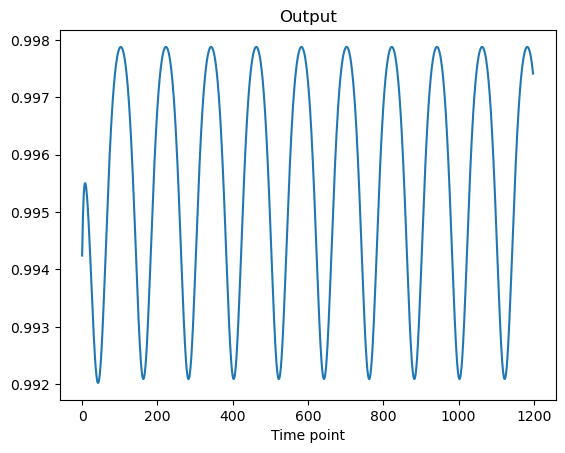

In [72]:
plt.plot(outputs)
plt.title("Output")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_fbtarget_output.png")

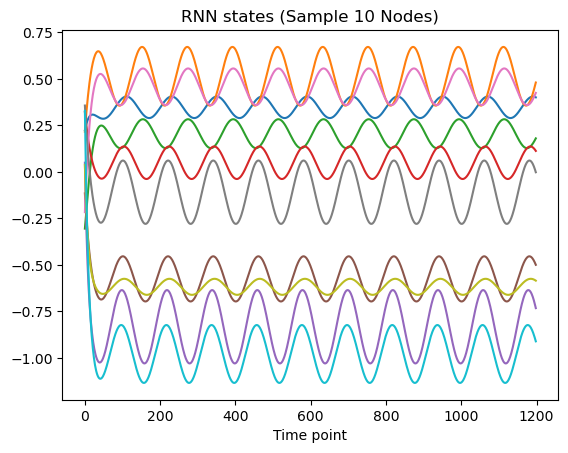

In [73]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])
plt.title("RNN states (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_fbtarget_states.png")

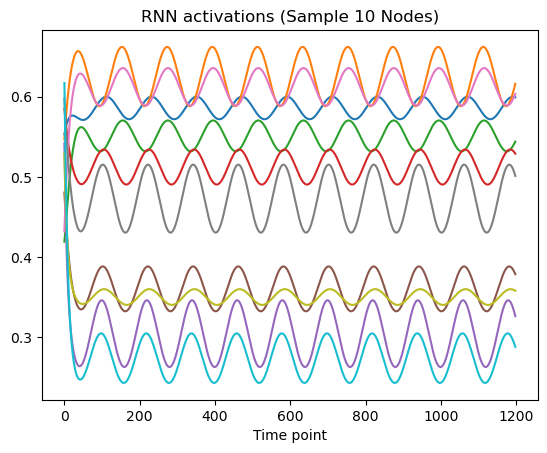

In [74]:
all_activations = np.concatenate(activations, axis=1)
for i in range(10):
    plt.plot(all_activations[i, :])
plt.title("RNN activations (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_fbtarget_activations.png")

### Test Hebbian Learning Based On Feedback Target

We input target from the start and let hebbian learning to modify the output weight matrix (using target instead of output here). With proper output gain and shift, it is very promising. Although there is a phase shift.

In [168]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(6000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [169]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [170]:
# simulation data
has_hebbian = True
hebbian_lr = 0.003
ext_weight_sum = 250
inh_weight_sum = 250
outputs, states, activations, output_weights = [], [], [], []
for i in time_points:
    
    # Creating RNN
    network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
              timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    network.i = i
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # prepare for hebbian learning
    this_target = targets[i].item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_target * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    outputs.append(this_output.detach().item())
    states.append(init_state)
    activations.append(this_activation)
    output_weights.append(this_output_weight_matrix)

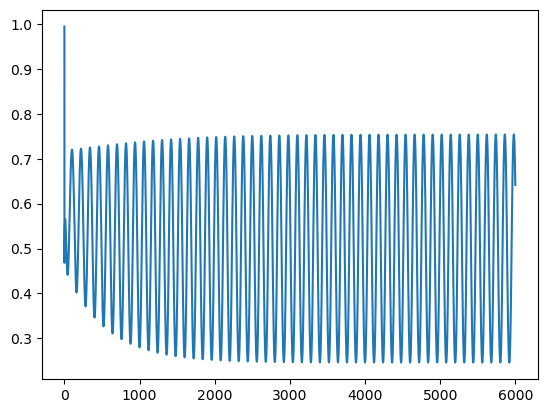

In [171]:
plt.plot(outputs)

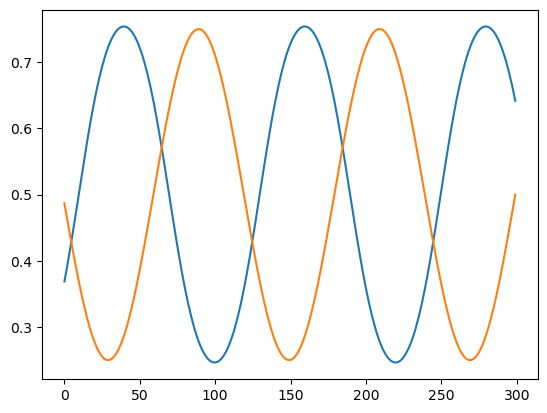

In [172]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

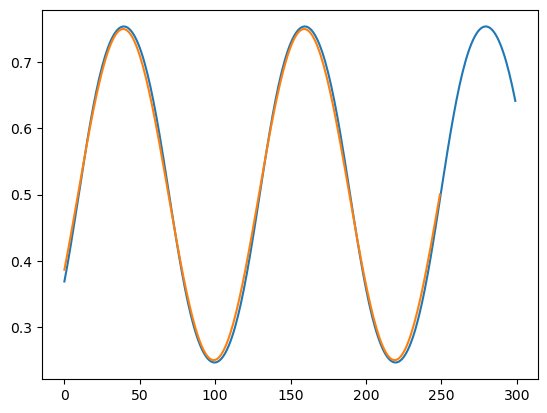

In [179]:
# the phase difference is that the output lags for 50 timepoints
plt.plot(outputs[-300:])
plt.plot(targets[-250:])

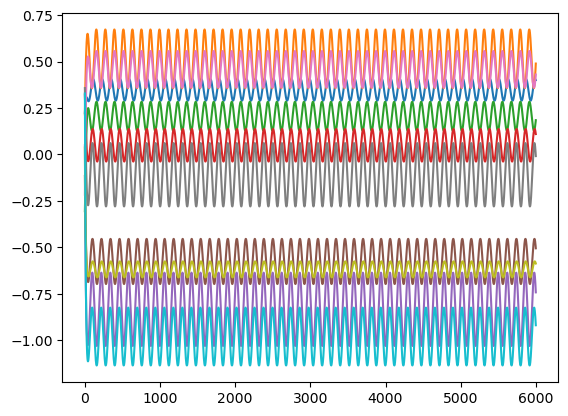

In [173]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

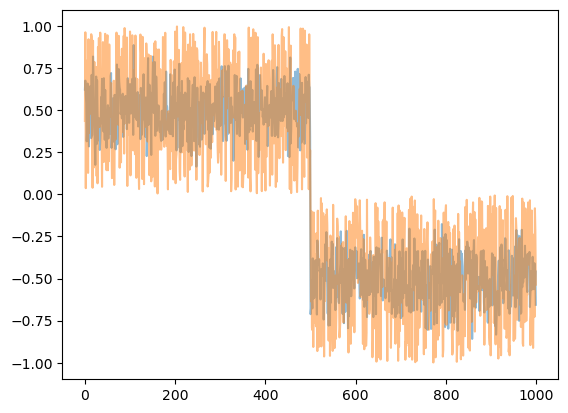

In [174]:
plt.plot(output_weights[-1].flatten(), alpha=0.5)
plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

In [175]:
output_weights[-1].flatten()

array([ 0.6229508 ,  0.6753219 ,  0.5917247 ,  0.5422308 ,  0.31505445,
        0.37841955,  0.6580282 ,  0.49558377,  0.37186986,  0.28480604,
        0.41023588,  0.5054662 ,  0.6429179 ,  0.5604909 ,  0.33435223,
        0.7095377 ,  0.34985325,  0.46762818,  0.8185058 ,  0.7136961 ,
        0.5566242 ,  0.4620083 ,  0.29484642,  0.17537415,  0.36717662,
        0.6996676 ,  0.2984211 ,  0.6772291 ,  0.48191273,  0.39360866,
        0.32100374,  0.4528346 ,  0.43169203,  0.26372874,  0.31599167,
        0.3960317 ,  0.5770458 ,  0.5416947 ,  0.68647355,  0.42013088,
        0.53924996,  0.3738835 ,  0.6897069 ,  0.54807025,  0.32432044,
        0.61984885,  0.44092524,  0.34929633,  0.27587023,  0.42943624,
        0.4652011 ,  0.52949786,  0.33149928,  0.48378655,  0.51328677,
        0.41845837,  0.35956407,  0.70324695,  0.72032624,  0.27581   ,
        0.3544031 ,  0.40245113,  0.5696098 ,  0.31294674,  0.4508496 ,
        0.3959372 ,  0.5908652 ,  0.48347187,  0.26754478,  0.47

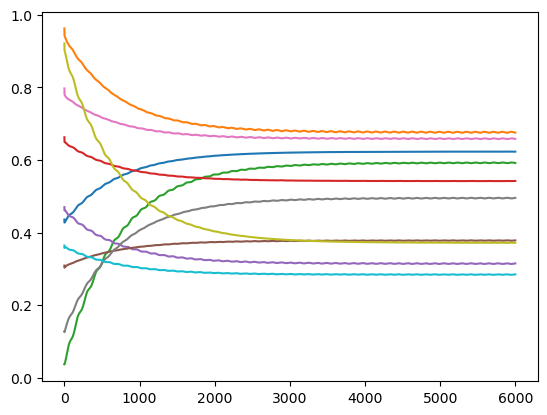

In [176]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

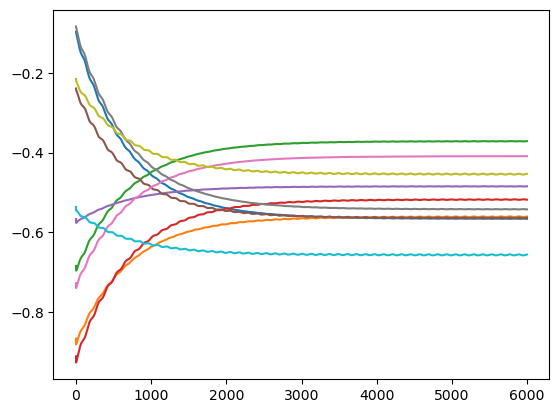

In [177]:
for i in range(990, 1000):
    plt.plot(all_output_weights[i, :])

### FORCE Learning On Gains

So next step we want to have the output similar to target by gain modulation. But this seems difficult. Without a proper input, the network has no wave.

I use SGD every 120 time points. This could only let the network to learn the mean.

In [85]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
# output_weight_matrix = right_output_weight_matrix
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(1200)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [86]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [87]:
# training
has_backprop = True
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()

In [88]:
# simulation data - every period
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes = [], []
for i in time_points:

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

        # Creating RNN
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
        # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.01)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
    # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state)
    output_weights.append(this_output_weight_matrix)
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)

In [89]:
network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
states, activations, outputs = network.simulate(120)

In [90]:
# # simulation data - every points
# losses, outputs, states, output_weights = [], [], [], []
# gain_changes, shift_changes = [], []
# for i in time_points:
    
#     # Creating RNN
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
#     # network.i = i
#     network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#               timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
#     opt = torch.optim.SGD([network.gain, network.shift], lr=0.01)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     init_state = network.state.detach().numpy()
#     this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # backprop
#     if has_backprop:
#         loss_val.backward()
#         opt.step()
#         # opt.zero_grad()
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(init_state)
#     output_weights.append(this_output_weight_matrix)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

In [91]:
# # training - random update points
# has_backprop = True
# loss_func = nn.MSELoss()
# time_points = np.arange(600)
# targets = (1 + np.sin((time_points+1)/60*np.pi))/2
# theo_gain = init_gain.copy()
# theo_shift = init_shift.copy()
# last_gain = init_gain.copy()
# last_shift = init_shift.copy()
# update_points = np.random.choice(time_points, 100, replace=False)

# # simulation data
# losses, outputs, states = [], [], []
# gain_changes, shift_changes = [], []

# # Creating RNN
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
# opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)

# for i in time_points:
    
#     if i in update_points:
#         # backprop
#         loss_val.backward()
#         opt.step()
#         # re-create RNN
#         network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
#         opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     this_state = network.state.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # save gains and shifts
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(this_state)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

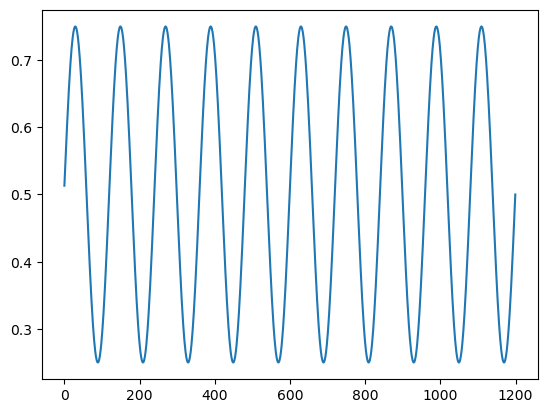

In [92]:
plt.plot(targets)

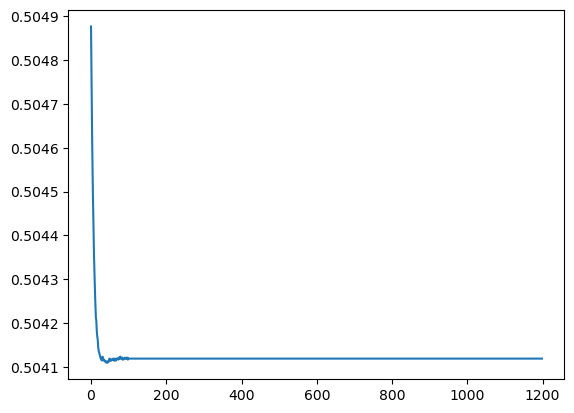

In [93]:
plt.plot(outputs)

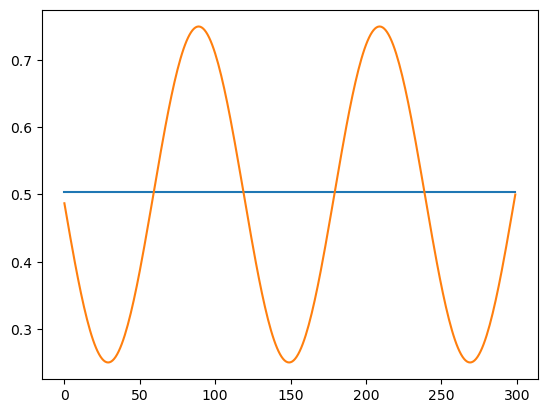

In [94]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

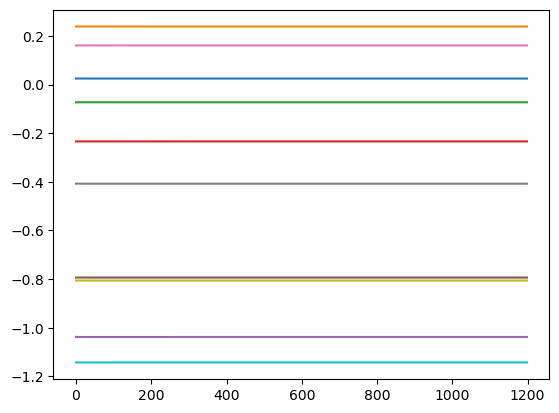

In [95]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

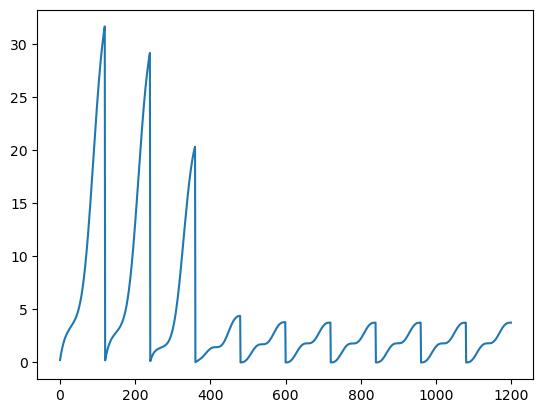

In [96]:
plt.plot(losses)

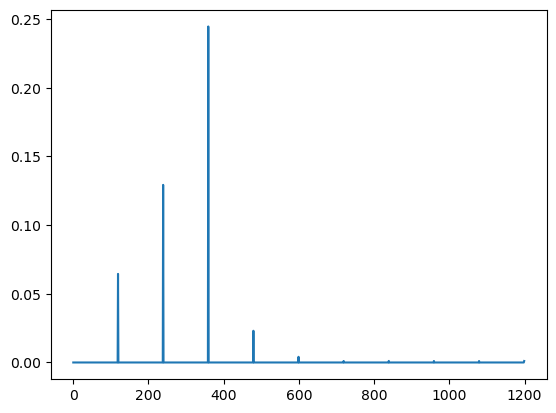

In [97]:
plt.plot(gain_changes)

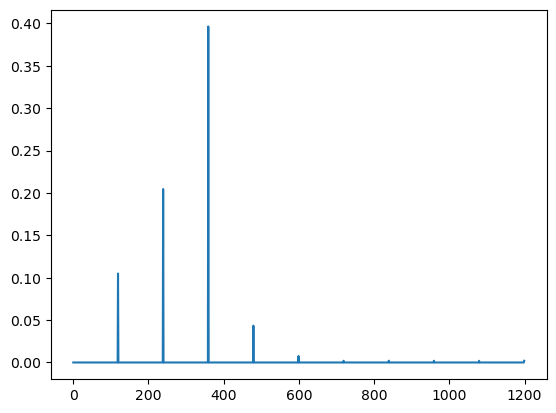

In [98]:
plt.plot(shift_changes)

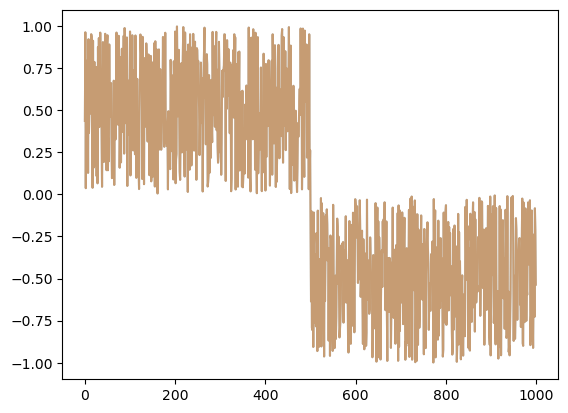

In [99]:
plt.plot(output_weights[-1].flatten(), alpha=0.5)
plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

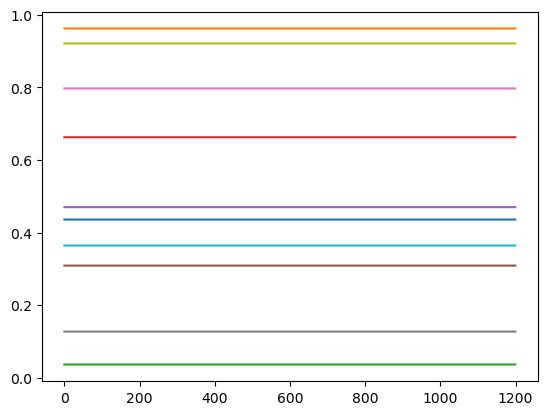

In [100]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

### FORCE Learning On Gains Plus Hebbian Learning

This is the ideal way but a first attempt: we want the network to have an ideal output by gain modulation, and then feed it back to the network so that the hebbian learning could make the network to learn the correct output weight matrix. 

But here I did not use a SGD on every period but every timepoint, so the output wave here is due to the fluctuation in gains and shifts. Even I use SGD on every period, by the section of FORCE Learning on Gains, it seems that the network could never learn the target by itself.

In [101]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(120000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [102]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [103]:
# training
has_backprop = True
has_hebbian = False
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()
hebbian_lr = 0.003
ext_weight_sum = 250
inh_weight_sum = 250

In [104]:
# simulation data
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes = [], []
for i in time_points:
    
    if len(losses) > 0 and losses[-1] < 0.01:
        has_hebbian = True
    
    # Creating RNN
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    # network.i = i
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
    network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
              timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
    opt = torch.optim.SGD([network.gain, network.shift], lr=0.002)
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val = loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        # opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
    # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # prepare for hebbian learning
    this_output_val = this_output.detach().item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_output_val * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state)
    output_weights.append(this_output_weight_matrix)
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)

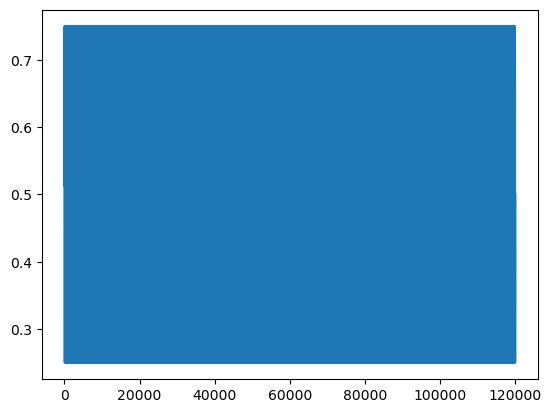

In [105]:
plt.plot(targets)

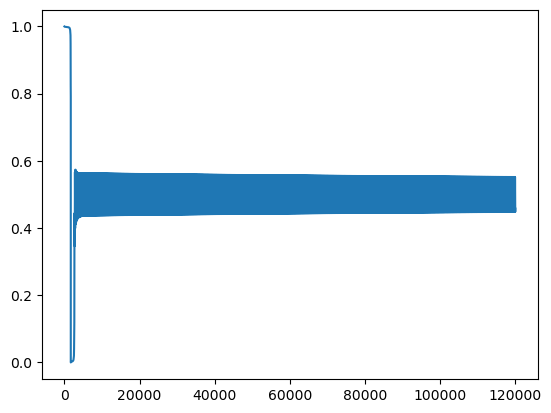

In [106]:
plt.plot(outputs)

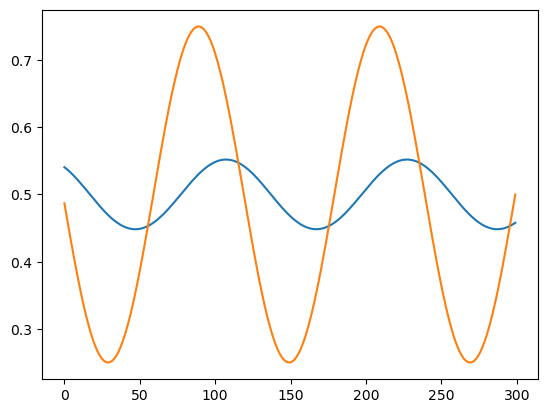

In [107]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

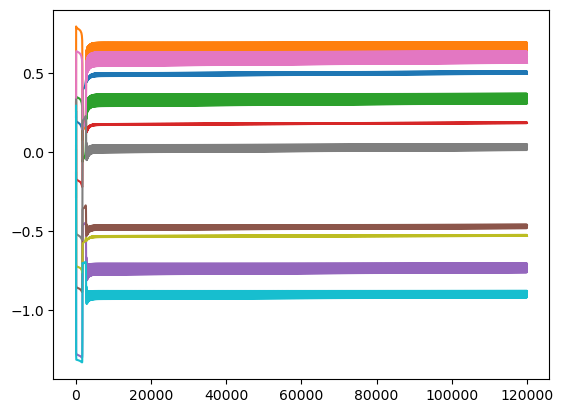

In [108]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

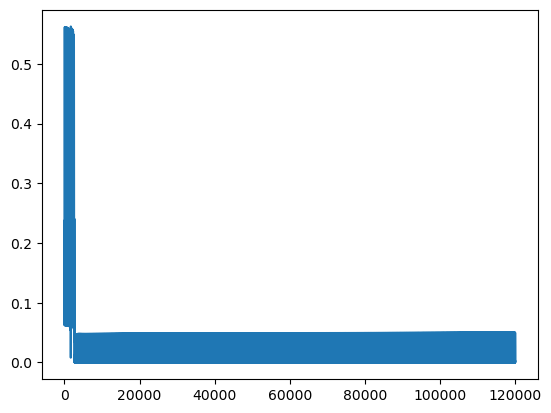

In [109]:
plt.plot(losses)

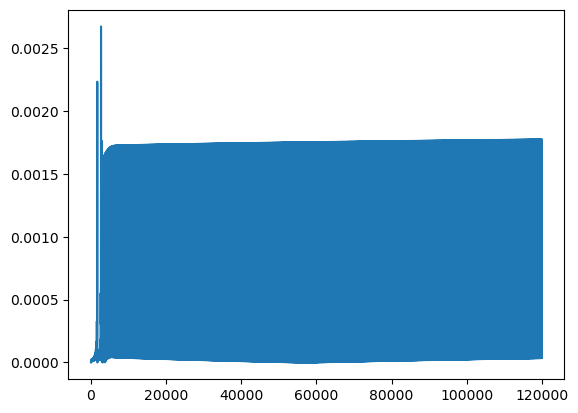

In [110]:
plt.plot(gain_changes)

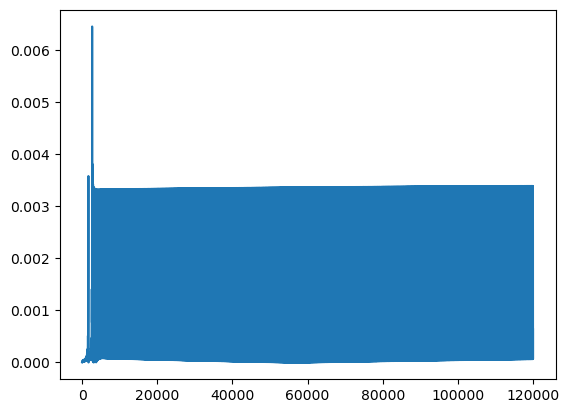

In [111]:
plt.plot(shift_changes)

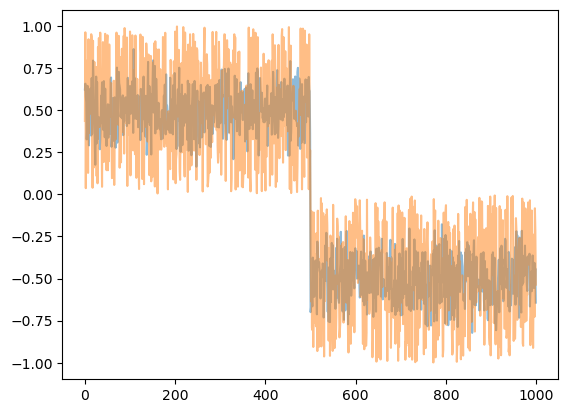

In [112]:
plt.plot(output_weights[-1].flatten(), alpha=0.5)
plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

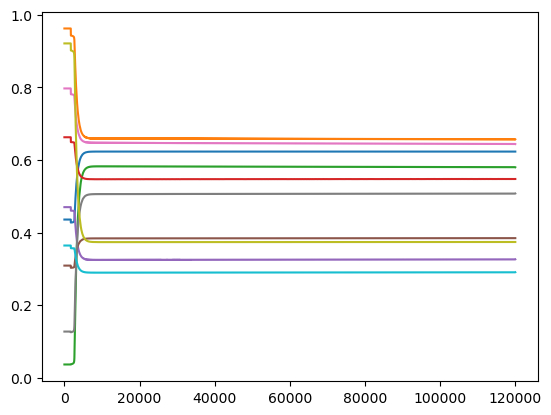

In [113]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

In [114]:
output_weights[-1].flatten()

array([ 0.62322134,  0.657217  ,  0.58025163,  0.54767877,  0.32623643,
        0.38475353,  0.6440831 ,  0.5075023 ,  0.37408215,  0.2906675 ,
        0.40729943,  0.5257761 ,  0.62730056,  0.5585269 ,  0.34930533,
        0.6900785 ,  0.3586621 ,  0.4729166 ,  0.794527  ,  0.69110227,
        0.55139846,  0.4768543 ,  0.3021009 ,  0.17585154,  0.38494784,
        0.6994015 ,  0.30236894,  0.66687495,  0.4785733 ,  0.40964293,
        0.3312593 ,  0.45814282,  0.4453407 ,  0.26756972,  0.3220044 ,
        0.41115618,  0.5862693 ,  0.54352665,  0.66517955,  0.42108423,
        0.5276488 ,  0.38181287,  0.6724384 ,  0.5264456 ,  0.33914408,
        0.6275048 ,  0.45613992,  0.3580624 ,  0.28713143,  0.44490096,
        0.46694046,  0.5351803 ,  0.3366547 ,  0.5025247 ,  0.53051   ,
        0.4206118 ,  0.35887495,  0.6836769 ,  0.6938424 ,  0.28225926,
        0.35445893,  0.41794974,  0.5710042 ,  0.31775266,  0.46166703,
        0.39081457,  0.5761414 ,  0.49309117,  0.2771485 ,  0.47

In [115]:
right_output_weight_matrix = output_weights[-1].copy()

### FORCE Learning On Gains With Target

By the failure of FORCE learning on Gains, it seems that without any wave-like input the network would just be static. So here I try to input the target to the network (in other words, clamp the feedback to the target), and then let the network to learn the ideal output with gain modulation. This seems successful even though it needs a long time.

In [116]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
t = 1200000
time_points = np.arange(t)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [117]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [118]:
# training
has_backprop = True
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()

In [119]:
# simulation data - every period
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes = [], []
for i in time_points:

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

        # Creating RNN
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
        # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.005)
        # opt = torch.optim.Adam([network.gain, network.shift], lr=0.001)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
    # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state[0:15,:])
    # output_weights.append(this_output_weight_matrix)
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)

In [120]:
# # simulation data - every points
# losses, outputs, states, output_weights = [], [], [], []
# gain_changes, shift_changes = [], []
# for i in time_points:
    
#     # Creating RNN
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
#     # network.i = i
#     network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#               timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
#     opt = torch.optim.SGD([network.gain, network.shift], lr=0.01)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     init_state = network.state.detach().numpy()
#     this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # backprop
#     if has_backprop:
#         loss_val.backward()
#         opt.step()
#         # opt.zero_grad()
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(init_state)
#     output_weights.append(this_output_weight_matrix)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

In [121]:
# # training - random update points
# has_backprop = True
# loss_func = nn.MSELoss()
# time_points = np.arange(600)
# targets = (1 + np.sin((time_points+1)/60*np.pi))/2
# theo_gain = init_gain.copy()
# theo_shift = init_shift.copy()
# last_gain = init_gain.copy()
# last_shift = init_shift.copy()
# update_points = np.random.choice(time_points, 100, replace=False)

# # simulation data
# losses, outputs, states = [], [], []
# gain_changes, shift_changes = [], []

# # Creating RNN
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
# opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)

# for i in time_points:
    
#     if i in update_points:
#         # backprop
#         loss_val.backward()
#         opt.step()
#         # re-create RNN
#         network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
#         opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     this_state = network.state.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # save gains and shifts
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(this_state)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

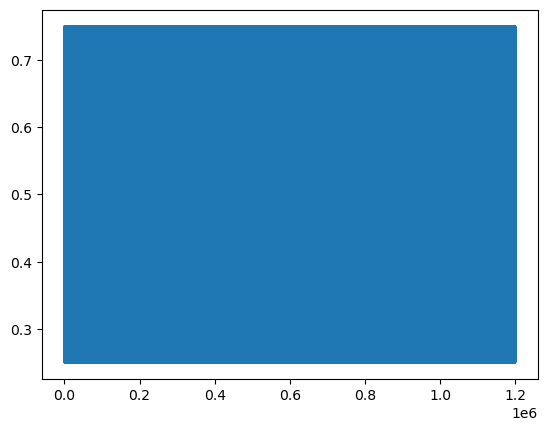

In [122]:
plt.plot(targets)

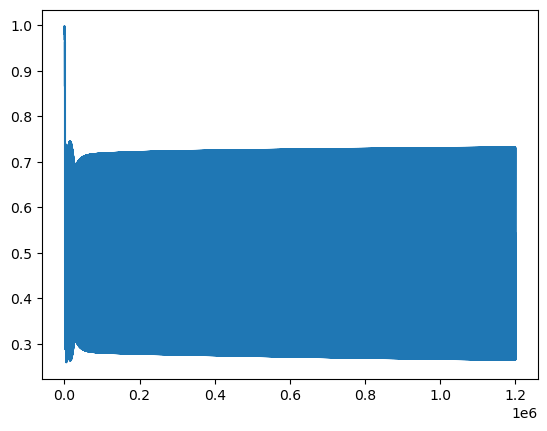

In [123]:
plt.plot(outputs)

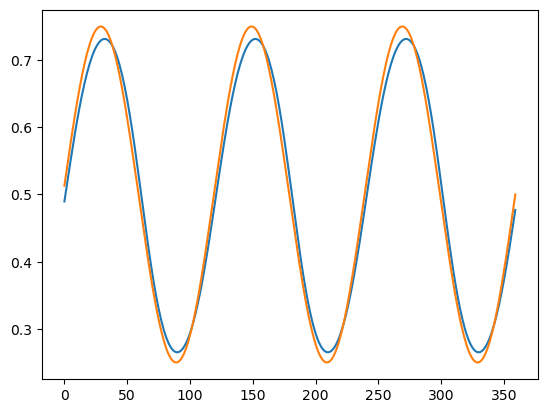

In [124]:
plt.plot(outputs[-360:])
plt.plot(targets[-360:])

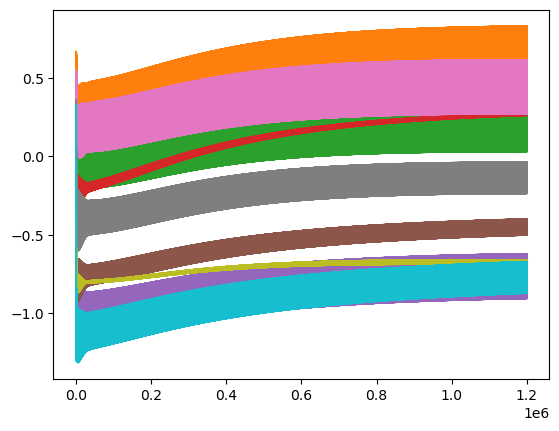

In [125]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

(0.0, 1.0)

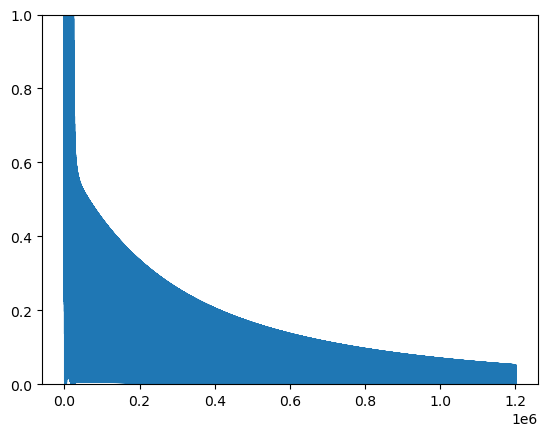

In [126]:
plt.plot(losses)
plt.ylim([0, 1])

(0.0, 0.005)

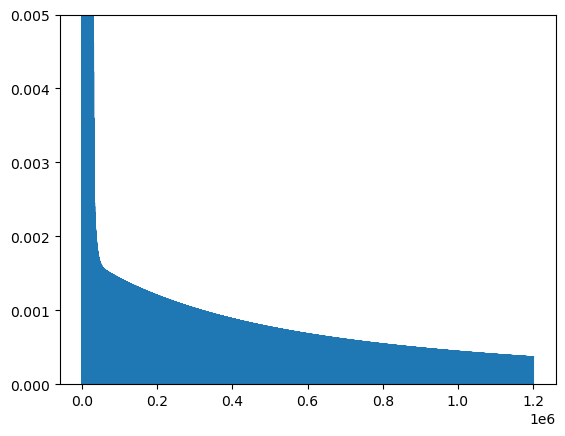

In [127]:
plt.plot(gain_changes)
plt.ylim([0, 0.005])

(0.0, 0.005)

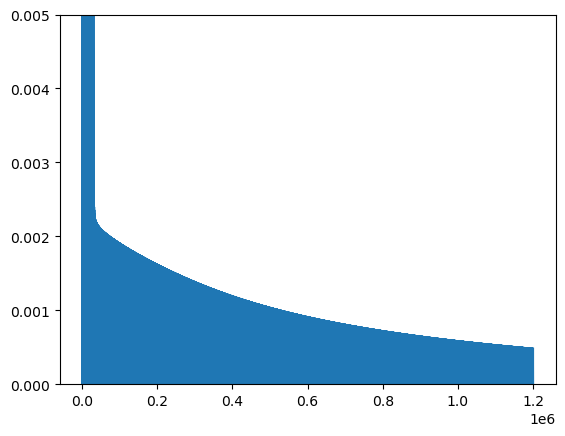

In [128]:
plt.plot(shift_changes)
plt.ylim([0, 0.005])

In [129]:
# plt.plot(output_weights[-1].flatten(), alpha=0.5)
# plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

In [130]:
# all_output_weights = np.concatenate(output_weights, axis=0).T
# for i in range(10):
#     plt.plot(all_output_weights[i, :])

### FORCE Learning On Gains with Target Plus Hebbian Learning

Based on the prvious section, we can then turn on hebbian learning once the output is closed to the target. So by the section of test Hebbian Learning Based On Feedback Target, we hope the network could learn the correct output weight matrix, and produce target even there is no gain modulation.

Subtle issues here: whether normalize output weight matrix at initialization. If yes, the loss would be very low at the beginning. If not, there would be a bump of loss when turning on hebbian learning. And simulation time matters the output.

In [131]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(1200000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [132]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

# normalize
ext_weight_sum = 250
inh_weight_sum = 250
tmp_output_weight_matrix = output_weight_matrix.copy()
tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
output_weight_matrix = tmp_output_weight_matrix.copy()
init_output_weight_matrix = output_weight_matrix.copy()

In [133]:
# training
has_backprop = True
has_hebbian = False
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()
max_hebbian_lr = 0.003
hebbian_lr_update = max_hebbian_lr / 30000
hebbian_lr = 0


In [134]:
# simulation data
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes, gain_theo_changes, shift_theo_changes = [], [], [], []

for i in time_points:

    if i > 800000:
        has_hebbian = True
    
    if has_hebbian and hebbian_lr < max_hebbian_lr:
        hebbian_lr += hebbian_lr_update

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

    # Creating RNN
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.005)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        # opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    gain_theo_change = np.linalg.norm(init_gain - theo_gain, 2)
    shift_theo_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # prepare for hebbian learning
    this_output_val = this_output.detach().item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_output_val * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state[0:15,:])
    output_weights.append(this_output_weight_matrix[:,0:15])
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)
    gain_theo_changes.append(gain_theo_change)
    shift_theo_changes.append(shift_theo_change)

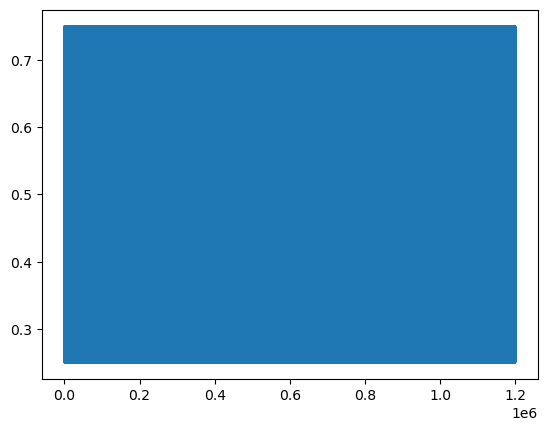

In [135]:
plt.plot(targets)

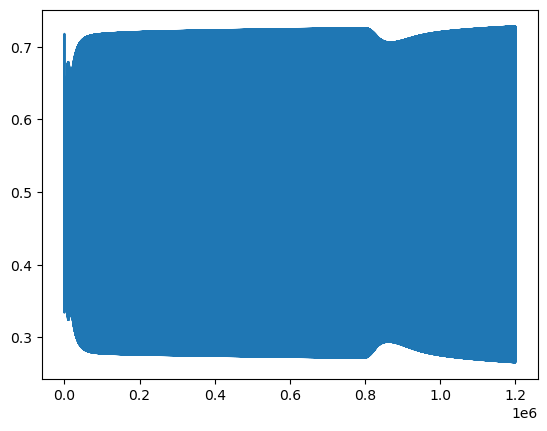

In [136]:
plt.plot(outputs)

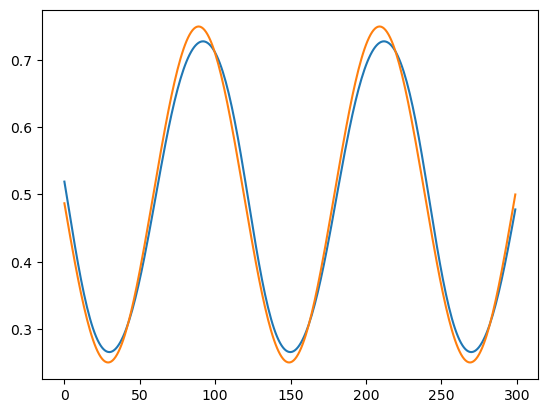

In [137]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

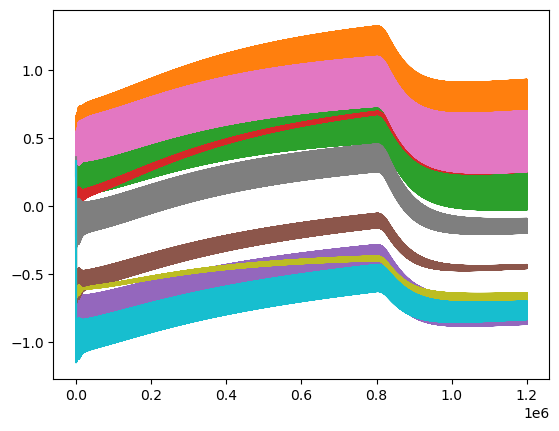

In [138]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

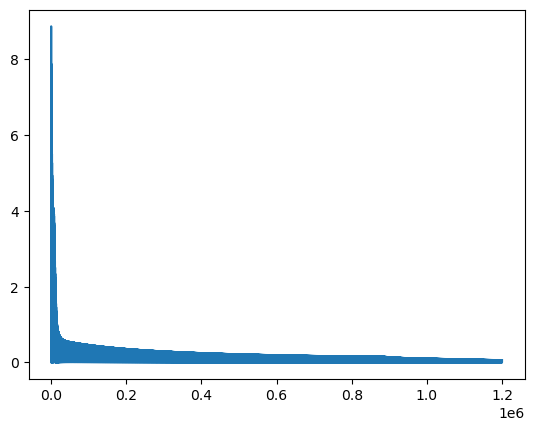

In [139]:
plt.plot(losses)

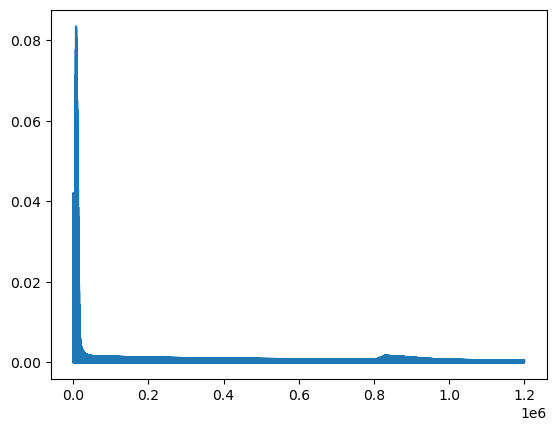

In [140]:
plt.plot(gain_changes)

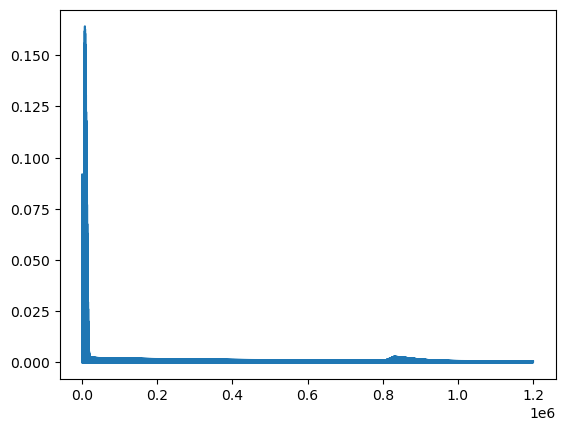

In [141]:
plt.plot(shift_changes)

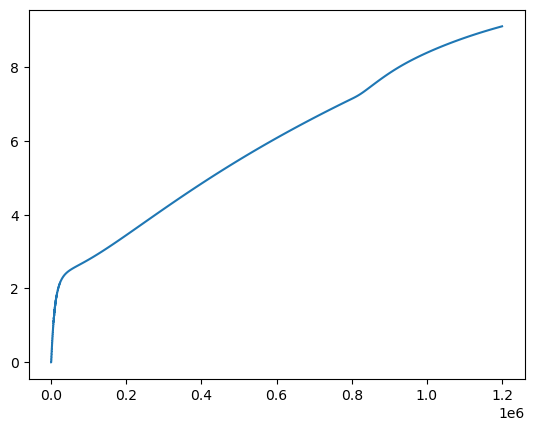

In [142]:
plt.plot(gain_theo_changes)

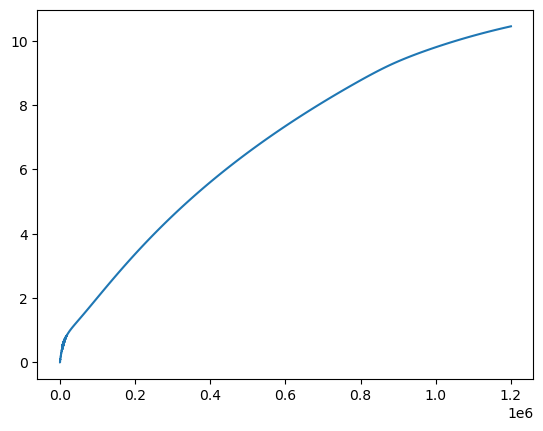

In [143]:
plt.plot(shift_theo_changes)

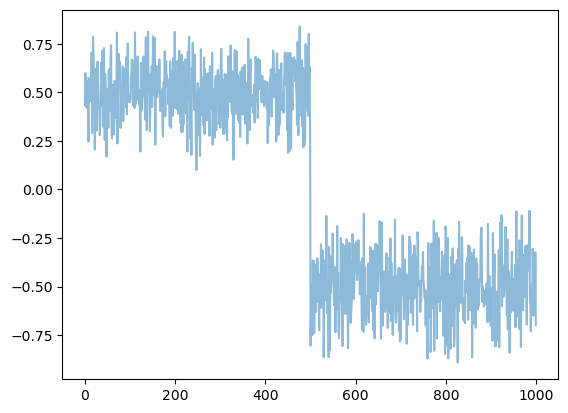

In [144]:
plt.plot(this_output_weight_matrix.flatten(), alpha=0.5)
# plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

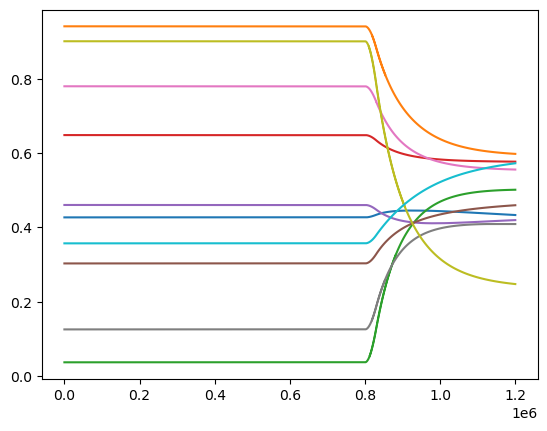

In [145]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

In [146]:
network = RNN(weight_matrix, connectivity_matrix, init_state, theo_gain, theo_shift, this_output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
states, activations, outputs = network.simulate(120)

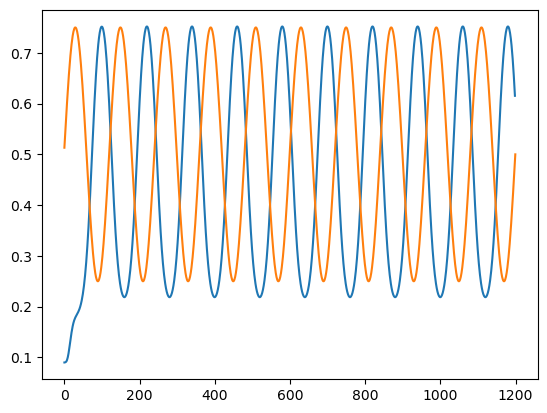

In [147]:
plt.plot(np.array(outputs)+0.09)
plt.plot(targets[0:1200])

In [148]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(1500000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [149]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

# normalize
ext_weight_sum = 250
inh_weight_sum = 250
# tmp_output_weight_matrix = output_weight_matrix.copy()
# tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
# tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
# tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
# tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
# tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
# tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
# output_weight_matrix = tmp_output_weight_matrix.copy()
init_output_weight_matrix = output_weight_matrix.copy()

In [150]:
# training
has_backprop = True
has_hebbian = False
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()
max_hebbian_lr = 0.003
hebbian_lr_update = max_hebbian_lr / 30000
hebbian_lr = 0


In [151]:
# simulation data
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes, gain_theo_changes, shift_theo_changes = [], [], [], []

for i in time_points:

    if i > 800000:
        has_hebbian = True
    
    if has_hebbian and hebbian_lr < max_hebbian_lr:
        hebbian_lr += hebbian_lr_update

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

    # Creating RNN
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.005)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        # opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    gain_theo_change = np.linalg.norm(init_gain - theo_gain, 2)
    shift_theo_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # prepare for hebbian learning
    this_output_val = this_output.detach().item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_output_val * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state[0:15,:])
    output_weights.append(this_output_weight_matrix[:,0:15])
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)
    gain_theo_changes.append(gain_theo_change)
    shift_theo_changes.append(shift_theo_change)

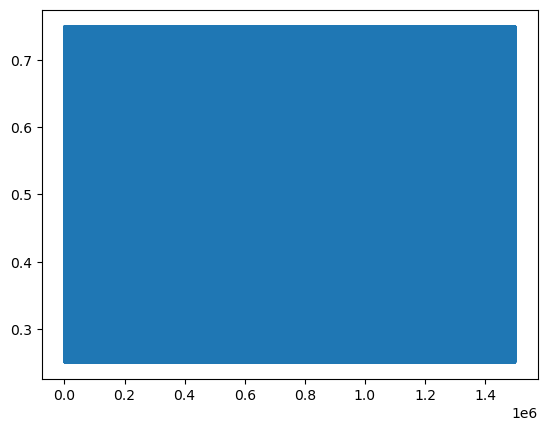

In [152]:
plt.plot(targets)

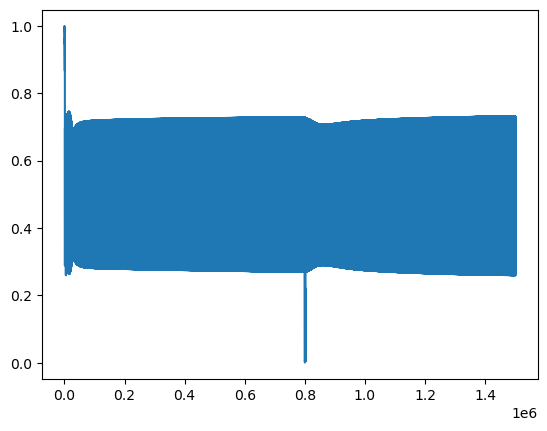

In [153]:
plt.plot(outputs)

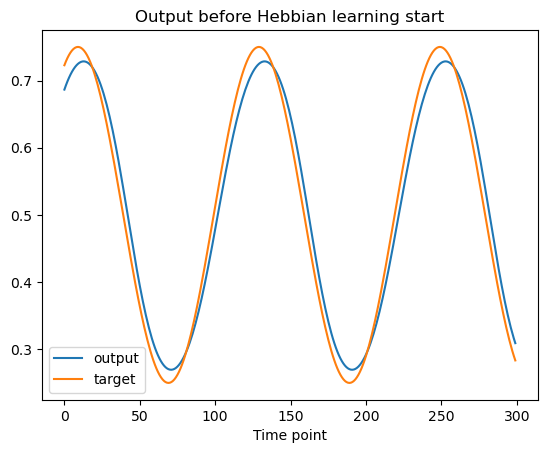

In [154]:
plt.plot(outputs[800000-300:800000], label='output')
plt.plot(targets[800000-300:800000], label='target')
plt.legend()
plt.title('Output before Hebbian learning start')
plt.xlabel('Time point')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_SGDoutput.png')

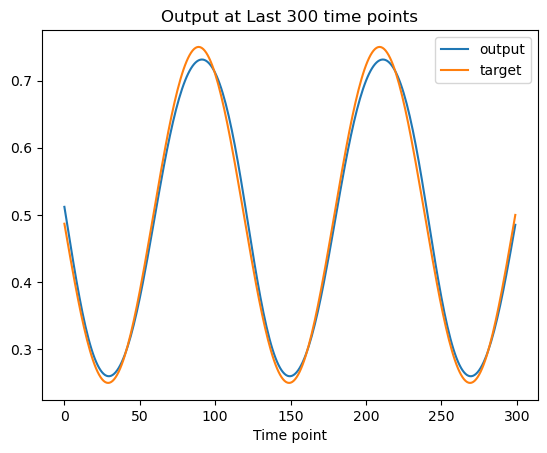

In [155]:
plt.plot(outputs[-300:], label='output')
plt.plot(targets[-300:], label='target')
plt.legend()
plt.title('Output at Last 300 time points')
plt.xlabel('Time point')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_lastoutput.png')

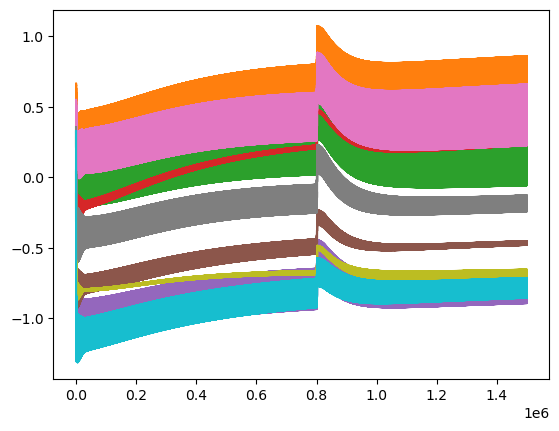

In [156]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

(0.0, 0.5)

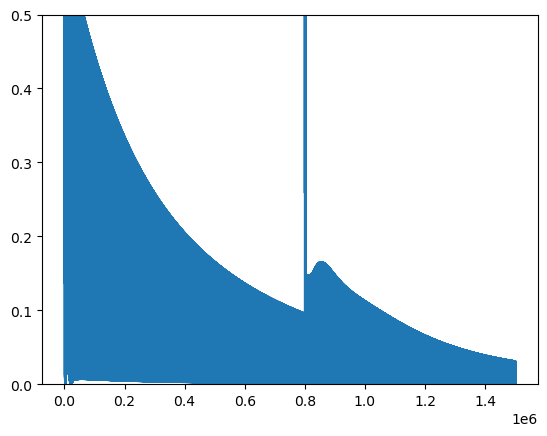

In [157]:
plt.plot(losses)
plt.ylim([0, 0.5])

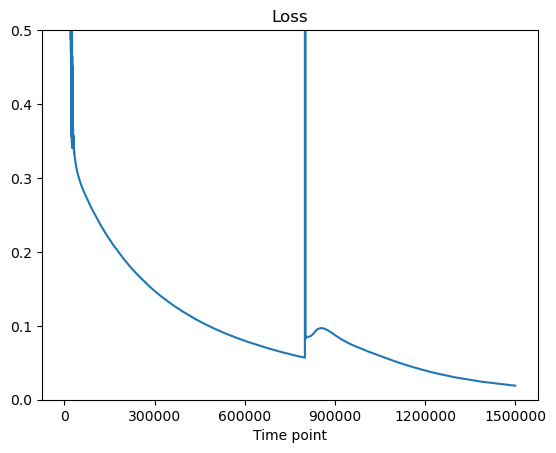

In [158]:
# get the average loss for every 120 time points
avg_losses = []
for i in range(len(losses)//120):
    avg_losses.append(np.mean(losses[i*120:(i+1)*120]))
plt.plot(avg_losses)
plt.ylim([0, 0.5])
plt.xticks(np.arange(0, 1500000//120+1, 2500), np.arange(0, 1500000+1, 2500*120))
plt.xlabel('Time point')
plt.title('Loss')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_loss.png')

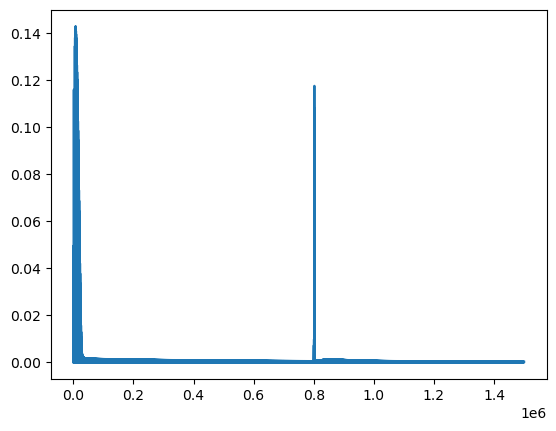

In [159]:
plt.plot(gain_changes)

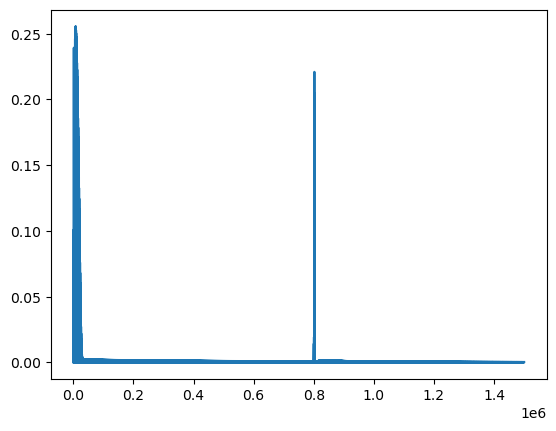

In [160]:
plt.plot(shift_changes)

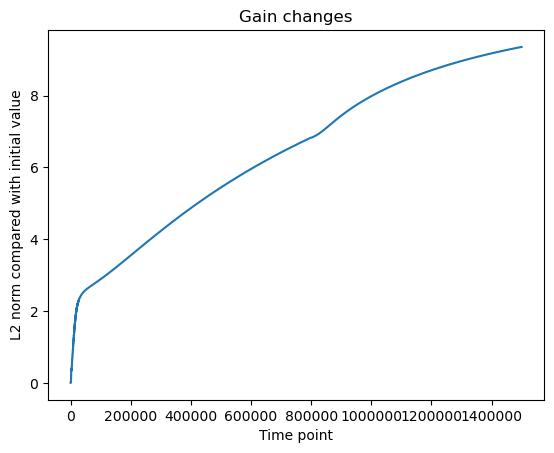

In [161]:
fig, ax = plt.subplots()
plt.plot(gain_theo_changes)
plt.xlabel('Time point')
plt.ylabel('L2 norm compared with initial value')
plt.title('Gain changes')
ax.ticklabel_format(useOffset=False, style='plain')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_theogc.png')

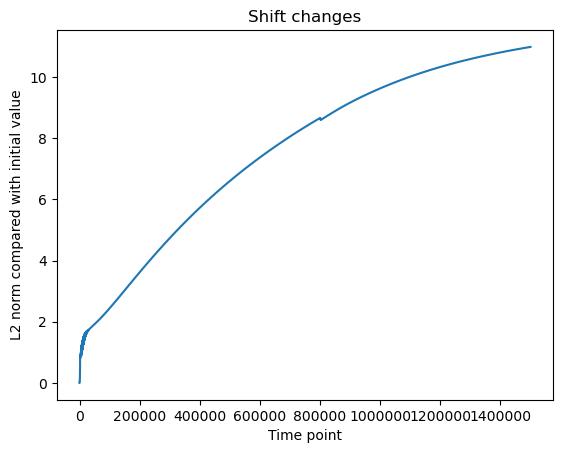

In [162]:
fig, ax = plt.subplots()
plt.plot(shift_theo_changes)
plt.xlabel('Time point')
plt.ylabel('L2 norm compared with initial value')
plt.title('Shift changes')
ax.ticklabel_format(useOffset=False, style='plain')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_theosc.png')

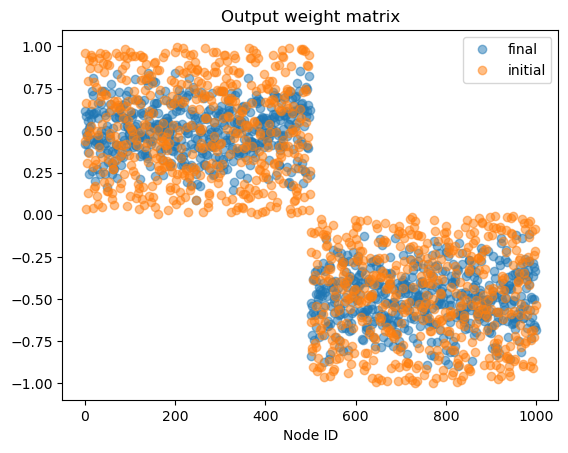

In [163]:
plt.plot(this_output_weight_matrix.flatten(), 'o', alpha=0.5, label='final')
plt.plot(init_output_weight_matrix.flatten(), 'o', alpha=0.5, label='initial')
plt.legend()
plt.title('Output weight matrix')
plt.xlabel('Node ID')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_outweight.png')

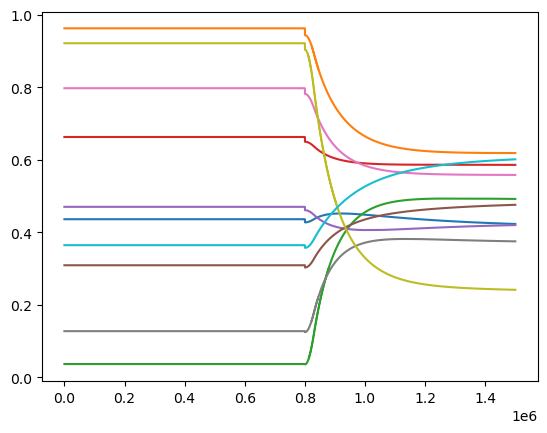

In [164]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

In [165]:
network = RNN(weight_matrix, connectivity_matrix, init_state, theo_gain, theo_shift, this_output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
states_nogain, activations_nogain, outputs_nogain = network.simulate(120)

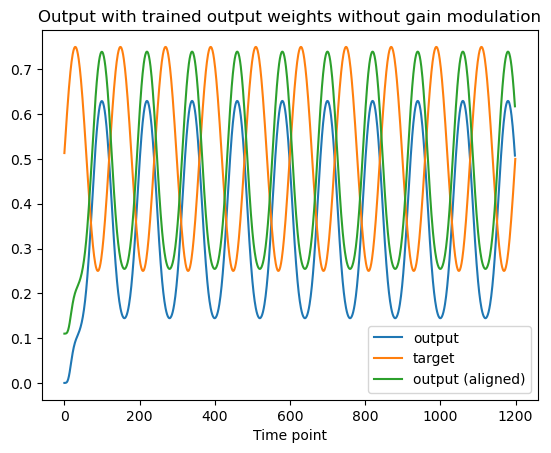

In [166]:
plt.plot(np.array(outputs_nogain), label='output')
plt.plot(targets[0:1200], label='target')
plt.plot(np.array(outputs_nogain)+0.11, label='output (aligned)')
plt.xlabel('Time point')
plt.legend()
plt.title('Output with trained output weights without gain modulation')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_nogainoutput.png')